# Dimensionality Reduction in Trading: Creating a Synthetic Volatility Feature with Kernel PCA

In this notebook, we create multiple volatility indicators using the quantreo library, standardize them properly, and apply a Kernel PCA to extract a single, interpretable synthetic volatility feature. This method helps reduce multicollinearity while retaining essential market information-ideal for building more robust machine learning models in algorithmic trading.

<br>

👉 Full Newsletter about this subject available here: [Click here](https://www.newsletter.quantreo.com/p/the-pca-trick-i-use-all-the-time)


In [ ]:
!pip install quantreo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
# Import the Features Engineering Package from Quantreo
import quantreo.features_engineering as fe

# Import scikit-learn packages
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Import pandas
import pandas as pd

# To display the graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# To remove some warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import a dataset to test the functions and create new ones easily
from quantreo.datasets import load_generated_ohlcv
df = load_generated_ohlcv()
df = df.loc["2016"]

# Show the data
df

,open,high,low,close,volume
time,,,,,
2016-01-04 00:00:00,104.944241,105.312073,104.929735,105.232289,576.805768
2016-01-04 04:00:00,105.233361,105.252139,105.047564,105.149357,485.696723
2016-01-04 08:00:00,105.159851,105.384745,105.141110,105.330306,403.969745
2016-01-04 12:00:00,105.330306,105.505799,104.894155,104.923404,1436.917324
2016-01-04 16:00:00,104.914147,105.023293,104.913252,105.014347,1177.672605
...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665


<br>

## Create volatility features

In this section, we generate multiple volatility indicators using different statistical estimators (Close-to-Close, Parkinson, Rogers-Satchell, and Yang-Zhang) over various time windows. These features will later be used for dimensionality reduction with PCA.

In [ ]:
# Standard volatility features
df["vol_close_to_close_30"] = fe.volatility.close_to_close_volatility(df, window_size=30)
df["vol_close_to_close_60"] = fe.volatility.close_to_close_volatility(df, window_size=60)
df["vol_close_to_close_90"] = fe.volatility.close_to_close_volatility(df, window_size=90)


# Parkinson volatility features
df["vol_parkinson_30"] = fe.volatility.parkinson_volatility(df, high_col="high", low_col="low", window_size=30)
df["vol_parkinson_60"] = fe.volatility.parkinson_volatility(df, high_col="high", low_col="low", window_size=60)
df["vol_parkinson_90"] = fe.volatility.parkinson_volatility(df, high_col="high", low_col="low", window_size=90)


# Rogers Satchell volatility feature
df["vol_rogers_satchell_30"] = fe.volatility.rogers_satchell_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=30)
df["vol_rogers_satchell_60"] = fe.volatility.rogers_satchell_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=60)
df["vol_rogers_satchell_90"] = fe.volatility.rogers_satchell_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=90)

# Yang Zhang volatility feature
df["vol_yang_zhang_30"] = fe.volatility.yang_zhang_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=30)
df["vol_yang_zhang_60"] = fe.volatility.yang_zhang_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=60)
df["vol_yang_zhang_90"] = fe.volatility.yang_zhang_volatility(df, high_col="high", low_col="low", open_col="open", close_col="close", window_size=90)


# Remove NaN values
df = df.dropna()
df

,open,high,low,close,volume,vol_close_to_close_30,vol_close_to_close_60,vol_close_to_close_90,vol_parkinson_30,vol_parkinson_60,vol_parkinson_90,vol_rogers_satchell_30,vol_rogers_satchell_60,vol_rogers_satchell_90,vol_yang_zhang_30,vol_yang_zhang_60,vol_yang_zhang_90
time,,,,,,,,,,,,,,,,,
2016-01-25 00:00:00,106.555463,106.619940,106.525121,106.532707,400.141966,0.002345,0.002699,0.002412,0.002263,0.002482,0.002290,0.002129,0.002305,0.002190,0.003240,0.003590,0.003285
2016-01-25 04:00:00,106.532707,106.720242,106.464985,106.511869,368.735806,0.002345,0.002700,0.002410,0.002223,0.002483,0.002279,0.002124,0.002306,0.002184,0.003145,0.003590,0.003265
2016-01-25 08:00:00,106.511869,106.624057,106.489799,106.576240,1370.025497,0.002345,0.002692,0.002405,0.002236,0.002484,0.002280,0.002149,0.002311,0.002189,0.003156,0.003592,0.003266
2016-01-25 12:00:00,106.576240,106.645947,106.530432,106.588189,1322.106513,0.002340,0.002692,0.002367,0.002236,0.002481,0.002277,0.002149,0.002308,0.002187,0.003157,0.003588,0.003260
2016-01-25 16:00:00,106.586174,106.776305,106.584397,106.711447,713.471009,0.002281,0.002621,0.002368,0.002216,0.002478,0.002248,0.002121,0.002302,0.002162,0.003141,0.003586,0.003214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484,0.002443,0.001955,0.001770,0.002410,0.002141,0.001925,0.002434,0.002263,0.002003,0.003399,0.002902,0.002628
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475,0.002438,0.001944,0.001742,0.002359,0.002139,0.001927,0.002328,0.002261,0.002007,0.003350,0.002901,0.002628
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665,0.002413,0.001949,0.001744,0.002357,0.002137,0.001904,0.002326,0.002261,0.001989,0.003347,0.002894,0.002591


In [ ]:
vol_features = [col for col in df.columns if "vol_" in col and "volatility" not in col]
vol_features

['vol_close_to_close_30',
 'vol_close_to_close_60',
 'vol_close_to_close_90',
 'vol_parkinson_30',
 'vol_parkinson_60',
 'vol_parkinson_90',
 'vol_rogers_satchell_30',
 'vol_rogers_satchell_60',
 'vol_rogers_satchell_90',
 'vol_yang_zhang_30',
 'vol_yang_zhang_60',
 'vol_yang_zhang_90']

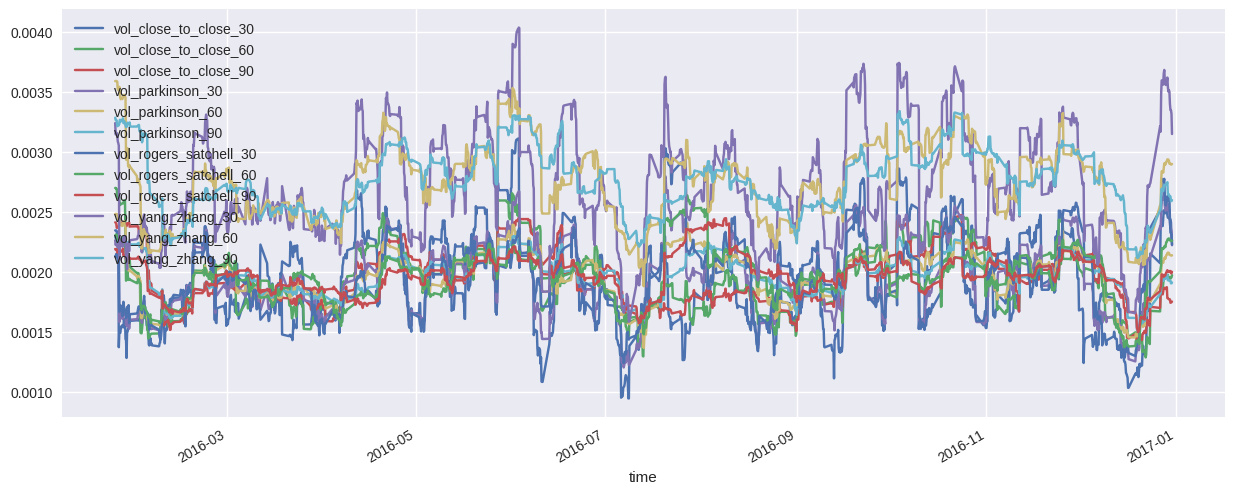

In [ ]:
df[vol_features].plot(figsize=(15,6))
plt.show()

<br>

## Split the Data

In this section, we simplify the setup by splitting the dataset into a single train/test split, keeping the chronological order (80% train, 20% test).

In a real-world scenario, especially if you're using walk-forward validation or cross-validation for time series, you'll need to reapply the PCA and standardization process for each train/test pair.

👉 **This is essential to avoid data leakage**: you must always fit the scaler and PCA only on the training data, and then apply the transformations to the test set—never the other way around.

In [ ]:
# Define the train size
train_size = int(len(df) * 0.8)

# Chronological split
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

# Check the result
print(f"Train set shape: {train_df.shape}")
print(f"Test set shape : {test_df.shape}")

Train set shape: (1166, 17)
Test set shape : (292, 17)


<br>

## Compute the correlation

In this section, we compute the linear correlation matrix between all the volatility features.
As expected, we observe strong correlations, since all features represent different ways of measuring volatility—using various estimators and time windows.

➡️ To reduce redundancy and simplify our feature set, we will combine these correlated variables into a single synthetic volatility feature in the next section using PCA.

In [ ]:
# Volatility Features Correlation
train_df[vol_features].corr()

,vol_close_to_close_30,vol_close_to_close_60,vol_close_to_close_90,vol_parkinson_30,vol_parkinson_60,vol_parkinson_90,vol_rogers_satchell_30,vol_rogers_satchell_60,vol_rogers_satchell_90,vol_yang_zhang_30,vol_yang_zhang_60,vol_yang_zhang_90
vol_close_to_close_30,1.000000,0.599491,0.532568,0.786928,0.419684,0.415357,0.468613,0.207244,0.207591,0.909776,0.528562,0.498202
vol_close_to_close_60,0.599491,1.000000,0.780076,0.486528,0.777840,0.619959,0.269050,0.409409,0.312633,0.561925,0.924510,0.735828
vol_close_to_close_90,0.532568,0.780076,1.000000,0.367164,0.567972,0.793055,0.147987,0.244776,0.381323,0.466929,0.707384,0.940331
vol_parkinson_30,0.786928,0.486528,0.367164,1.000000,0.604898,0.490607,0.894890,0.554699,0.458803,0.957219,0.580468,0.455358
vol_parkinson_60,0.419684,0.777840,0.567972,0.604898,1.000000,0.755968,0.564282,0.879006,0.694088,0.544149,0.947165,0.695858
vol_parkinson_90,0.415357,0.619959,0.793055,0.490607,0.755968,1.000000,0.406124,0.634386,0.856738,0.481229,0.728634,0.944391
vol_rogers_satchell_30,0.468613,0.269050,0.147987,0.894890,0.564282,0.406124,1.000000,0.668470,0.525420,0.736153,0.444266,0.290875
vol_rogers_satchell_60,0.207244,0.409409,0.244776,0.554699,0.879006,0.634386,0.668470,1.000000,0.791007,0.405551,0.687448,0.456468
vol_rogers_satchell_90,0.207591,0.312633,0.381323,0.458803,0.694088,0.856738,0.525420,0.791007,1.000000,0.356169,0.532991,0.646398
vol_yang_zhang_30,0.909776,0.561925,0.466929,0.957219,0.544149,0.481229,0.736153,0.405551,0.356169,1.000000,0.590113,0.507433


<br>

## Standardize the data

In this section, we standardize the volatility features before applying PCA.
This step is essential because PCA and Kernel PCA are geometry-based algorithms—they rely on distances and projections in multidimensional space.

📏 Therefore, they are very sensitive to differences in scale between features. Standardizing ensures that each feature contributes equally to the principal components.

In [ ]:
# Standardize the features using only the training set
scaler = StandardScaler()
scaler.fit(train_df[vol_features])  # Fit on training data only

# Transform both train and full dataset using the same scaler
train_df_scaled = scaler.transform(train_df[vol_features])
df_vol_scaled = scaler.transform(df[vol_features])

# Convert the scaled full dataset to a DataFrame for easier handling
df_vol_scaled = pd.DataFrame(df_vol_scaled, index=df.index, columns=vol_features)

# Display the standardized volatility features
df_vol_scaled

,vol_close_to_close_30,vol_close_to_close_60,vol_close_to_close_90,vol_parkinson_30,vol_parkinson_60,vol_parkinson_90,vol_rogers_satchell_30,vol_rogers_satchell_60,vol_rogers_satchell_90,vol_yang_zhang_30,vol_yang_zhang_60,vol_yang_zhang_90
time,,,,,,,,,,,,
2016-01-25 00:00:00,1.091466,2.765275,1.926606,1.095565,2.564295,1.922593,0.618594,1.651554,1.316034,1.161732,2.683498,1.972462
2016-01-25 04:00:00,1.091720,2.766503,1.919345,0.960813,2.567392,1.857404,0.601485,1.658413,1.277235,0.952715,2.685414,1.898445
2016-01-25 08:00:00,1.091871,2.739229,1.897153,1.003641,2.572604,1.867642,0.687123,1.683340,1.305287,0.977498,2.689814,1.901022
2016-01-25 12:00:00,1.077595,2.739343,1.738595,1.005172,2.558759,1.847837,0.684642,1.668147,1.293288,0.979626,2.679231,1.878483
2016-01-25 16:00:00,0.929629,2.480866,1.743363,0.936354,2.545797,1.675184,0.590553,1.638256,1.142595,0.943654,2.670578,1.708463
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 04:00:00,1.337582,0.055422,-0.744434,1.595873,0.890794,-0.252970,1.660170,1.451338,0.188693,1.510376,0.499556,-0.481015
2016-12-30 08:00:00,1.324602,0.016657,-0.860859,1.421677,0.883914,-0.241471,1.298123,1.441656,0.212126,1.402477,0.496974,-0.483710
2016-12-30 12:00:00,1.261696,0.035393,-0.854653,1.415892,0.870358,-0.378203,1.292742,1.438576,0.100167,1.397294,0.475905,-0.622091


<br>

## Apply the PCA

In this section, we apply Kernel PCA to combine all the standardized volatility features into a single synthetic variable.

By training the PCA model only on the training set, we ensure no data leakage.
We then transform the full dataset using the same projection.

🎯 The result is a new column, volatility, which captures the common dynamics across all volatility estimators—providing a clean, compact, and interpretable feature for modeling.

In [ ]:
# Call the PCA method from scikit learn
pca = KernelPCA(n_components=1)

# Train the PCA on the train set
pca.fit(train_df_scaled)

# Apply the PCA on the whole dataset
df["volatility"] = pca.transform(df_vol_scaled)
df

,open,high,low,close,volume,vol_close_to_close_30,vol_close_to_close_60,vol_close_to_close_90,vol_parkinson_30,vol_parkinson_60,vol_parkinson_90,vol_rogers_satchell_30,vol_rogers_satchell_60,vol_rogers_satchell_90,vol_yang_zhang_30,vol_yang_zhang_60,vol_yang_zhang_90,volatility
time,,,,,,,,,,,,,,,,,,
2016-01-25 00:00:00,106.555463,106.619940,106.525121,106.532707,400.141966,0.002345,0.002699,0.002412,0.002263,0.002482,0.002290,0.002129,0.002305,0.002190,0.003240,0.003590,0.003285,6.140700
2016-01-25 04:00:00,106.532707,106.720242,106.464985,106.511869,368.735806,0.002345,0.002700,0.002410,0.002223,0.002483,0.002279,0.002124,0.002306,0.002184,0.003145,0.003590,0.003265,5.985926
2016-01-25 08:00:00,106.511869,106.624057,106.489799,106.576240,1370.025497,0.002345,0.002692,0.002405,0.002236,0.002484,0.002280,0.002149,0.002311,0.002189,0.003156,0.003592,0.003266,6.033394
2016-01-25 12:00:00,106.576240,106.645947,106.530432,106.588189,1322.106513,0.002340,0.002692,0.002367,0.002236,0.002481,0.002277,0.002149,0.002308,0.002187,0.003157,0.003588,0.003260,5.958743
2016-01-25 16:00:00,106.586174,106.776305,106.584397,106.711447,713.471009,0.002281,0.002621,0.002368,0.002216,0.002478,0.002248,0.002121,0.002302,0.002162,0.003141,0.003586,0.003214,5.632407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 04:00:00,103.632257,103.711884,103.495896,103.564574,563.932484,0.002443,0.001955,0.001770,0.002410,0.002141,0.001925,0.002434,0.002263,0.002003,0.003399,0.002902,0.002628,2.113611
2016-12-30 08:00:00,103.564574,103.629321,103.555581,103.616731,697.707475,0.002438,0.001944,0.001742,0.002359,0.002139,0.001927,0.002328,0.002261,0.002007,0.003350,0.002901,0.002628,1.901505
2016-12-30 12:00:00,103.615791,103.628165,103.496810,103.515847,1768.926665,0.002413,0.001949,0.001744,0.002357,0.002137,0.001904,0.002326,0.002261,0.001989,0.003347,0.002894,0.002591,1.760895


<br>

## Plot the result
In this section, we plot the newly created PCA-based volatility feature alongside a few selected original volatility indicators.

This visual comparison allows us to see how the PCA feature captures the overall structure and dynamic behavior of multiple volatility estimators, while reducing the dimensionality of our dataset.

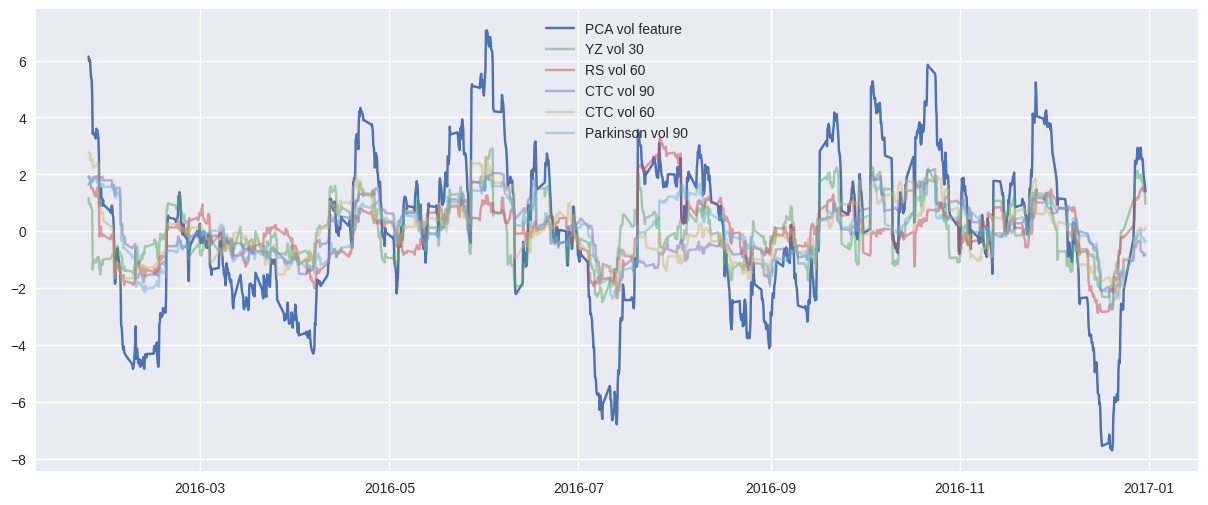

In [ ]:
# Plot the result
plt.figure(figsize=(15,6))
plt.plot(df["volatility"], label="PCA vol feature")
plt.plot(df_vol_scaled["vol_yang_zhang_30"], label="YZ vol 30", alpha=0.5)
plt.plot(df_vol_scaled["vol_rogers_satchell_60"], label="RS vol 60", alpha=0.5)
plt.plot(df_vol_scaled["vol_close_to_close_90"], label="CTC vol 90", alpha=0.5)
plt.plot(df_vol_scaled["vol_close_to_close_60"], label="CTC vol 60", alpha=0.5)
plt.plot(df_vol_scaled["vol_parkinson_90"], label="Parkinson vol 90", alpha=0.5)
plt.legend()
plt.show()

In [ ]:
vol_features.append("volatility")
df[vol_features].corr()

,vol_close_to_close_30,vol_close_to_close_60,vol_close_to_close_90,vol_parkinson_30,vol_parkinson_60,vol_parkinson_90,vol_rogers_satchell_30,vol_rogers_satchell_60,vol_rogers_satchell_90,vol_yang_zhang_30,vol_yang_zhang_60,vol_yang_zhang_90,volatility
vol_close_to_close_30,1.000000,0.622729,0.529249,0.795326,0.494123,0.440977,0.498552,0.315415,0.265091,0.914988,0.575136,0.504175,0.718222
vol_close_to_close_60,0.622729,1.000000,0.790660,0.493236,0.800117,0.652917,0.280759,0.469861,0.376300,0.579552,0.932275,0.750697,0.817437
vol_close_to_close_90,0.529249,0.790660,1.000000,0.370584,0.604567,0.820315,0.171498,0.319040,0.453938,0.469336,0.729799,0.946896,0.757126
vol_parkinson_30,0.795326,0.493236,0.370584,1.000000,0.632785,0.486114,0.903379,0.606778,0.465545,0.956807,0.591543,0.450544,0.798380
vol_parkinson_60,0.494123,0.800117,0.604567,0.632785,1.000000,0.760298,0.566625,0.892623,0.700151,0.597804,0.951232,0.709476,0.914034
vol_parkinson_90,0.440977,0.652917,0.820315,0.486114,0.760298,1.000000,0.390653,0.640948,0.871848,0.494222,0.744983,0.951260,0.862407
vol_rogers_satchell_30,0.498552,0.280759,0.171498,0.903379,0.566625,0.390653,1.000000,0.675797,0.496002,0.748073,0.443514,0.292706,0.663145
vol_rogers_satchell_60,0.315415,0.469861,0.319040,0.606778,0.892623,0.640948,0.675797,1.000000,0.769274,0.488155,0.717514,0.492382,0.770538
vol_rogers_satchell_90,0.265091,0.376300,0.453938,0.465545,0.700151,0.871848,0.496002,0.769274,1.000000,0.390517,0.565663,0.685468,0.731149
vol_yang_zhang_30,0.914988,0.579552,0.469336,0.956807,0.597804,0.494222,0.748073,0.488155,0.390517,1.000000,0.621445,0.510435,0.801841


We created several volatility indicators and observed strong correlations between them.
To reduce redundancy, we applied Kernel PCA (after proper standardization) to generate one synthetic volatility feature.
This new feature captures the overall market volatility in a compact and interpretable way.

It can now be used as a robust input for any predictive or risk model.

In real trading pipelines, this PCA+scaling process must be repeated on each train/test split to avoid data leakage